In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('vgchartz-2024.csv')
data.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
data2 = data.rename(columns = {'critic_score': 'rating'})
data3 = data2.dropna() #Did not use ffill as accurate ratings are necessary
df = data3.drop_duplicates()

In [4]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer', 'rating',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update'],
      dtype='object')

In [5]:
cleaned_df = df
df.head()

,img,title,console,genre,publisher,developer,rating,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [6]:
df.shape

(282, 14)

In [7]:
#Sort title based on rating
top_rated_games = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(50)
print(top_rated_games)

title
Red Dead Redemption 2                            9.800000
The Walking Dead: A Telltale Games Series        9.700000
Assassin's Creed Odyssey                         9.500000
BioShock Infinite                                9.500000
Rayman Legends                                   9.500000
Dragon Quest XI: Echoes of an Elusive Age        9.500000
The Legend of Zelda: Oracle of Ages              9.400000
Sid Meier's Civilization VI                      9.400000
Grand Theft Auto V                               9.350000
Halo: Reach                                      9.300000
The Legend of Zelda: Oracle of Seasons           9.300000
Ape Escape                                       9.300000
Final Fantasy X / X-2 HD Remaster                9.300000
Shadow of the Colossus                           9.300000
Forza Horizon 4                                  9.200000
Battlefield 1                                    9.200000
Metroid: Samus Returns                           9.100000
NBA 2K17

In [8]:
# Rank count
rating_counts = df.groupby('title')['rating'].count().sort_values(ascending=False).head(25)
rating_counts

title
Call of Duty: Advanced Warfare        4
Call of Duty: Ghosts                  4
Resident Evil: Revelations            4
Need for Speed: Most Wanted (2012)    3
Battlefield 4                         3
Assassin's Creed IV: Black Flag       3
The Elder Scrolls V: Skyrim           3
NBA 2K18                              3
Minecraft                             3
Metal Gear Solid V: Ground Zeroes     3
Dead or Alive 5 Last Round            2
The Evil Within                       2
Sniper Elite V2                       2
Star Wars Battlefront (2015)          2
F1 2013                               2
Dead or Alive 5                       2
FIFA 15                               2
FIFA 16                               2
FIFA 18                               2
Fallout 4                             2
2014 FIFA World Cup Brazil            2
Saints Row 2                          2
Far Cry 4                             2
Sleeping Dogs                         2
Darksiders II                     

In [9]:
df[['title', 'rating']]

,title,rating
1,Grand Theft Auto V,9.7
4,Call of Duty: Black Ops 3,8.1
7,Red Dead Redemption 2,9.8
8,Call of Duty: Black Ops II,8.4
9,Call of Duty: Black Ops II,8.0
...,...,...
11794,RPG Maker: Fes,7.0
11920,BlazBlue: Cross Tag Battle,8.0
12216,Disgaea 1 Complete,8.0
13198,GrimGrimoire,7.7


In [10]:
#Calculate average ratings
ratings_mean = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_mean

,rating
title,
2014 FIFA World Cup Brazil,7.6
7th Dragon III Code: VFD,7.5
Animal Crossing: Amiibo Festival,4.8
Ape Escape,9.3
Ape Escape 2,8.0
...,...
Xenoblade Chronicles,8.6
Xenoblade Chronicles 2: Torna ~ The Golden Country,7.5
Xenoblade Chronicles X,8.1


In [11]:
#Calculate rating and rating counts
ratings_mean['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_mean['rating'] = round(ratings_mean['rating'],1)
ratings_mean.head()

,rating,rating_counts
title,,
2014 FIFA World Cup Brazil,7.6,2
7th Dragon III Code: VFD,7.5,1
Animal Crossing: Amiibo Festival,4.8,1
Ape Escape,9.3,1
Ape Escape 2,8.0,1


In [12]:
#Show only titles with high rating count to show popular games
ratings_mean = ratings_mean[(ratings_mean['rating'] > 5) & (ratings_mean['rating_counts'] > 3)]
ratings_mean.head()

,rating,rating_counts
title,,
Call of Duty: Advanced Warfare,8.8,4
Call of Duty: Ghosts,7.7,4
Resident Evil: Revelations,7.4,4


In [13]:
top_genre = df.groupby('genre')['rating'].mean().sort_values(ascending=False).head(50)
top_genre

genre
Sandbox             9.200000
Music               8.700000
MMO                 8.400000
Adventure           8.342857
Strategy            8.333333
Action-Adventure    7.950000
Role-Playing        7.897561
Shooter             7.886957
Puzzle              7.700000
Sports              7.650000
Racing              7.547826
Action              7.448485
Platform            7.448000
Fighting            7.408333
Misc                6.918182
Simulation          6.685714
Party               5.550000
Board Game          5.300000
Name: rating, dtype: float64

In [14]:
genre_counts = df.groupby('genre')['rating'].count().sort_values(ascending=False).head(25)
genre_counts

genre
Shooter             46
Role-Playing        41
Action              33
Action-Adventure    32
Platform            25
Sports              24
Racing              23
Fighting            12
Misc                11
Adventure            7
Simulation           7
Strategy             6
Puzzle               5
Party                4
Music                3
MMO                  1
Board Game           1
Sandbox              1
Name: rating, dtype: int64

In [15]:
df[['genre', 'rating']]

,genre,rating
1,Action,9.7
4,Shooter,8.1
7,Action-Adventure,9.8
8,Shooter,8.4
9,Shooter,8.0
...,...,...
11794,Role-Playing,7.0
11920,Fighting,8.0
12216,Role-Playing,8.0
13198,Strategy,7.7


In [16]:
#Calculate the genre and rating
genre_mean = pd.DataFrame(df.groupby('genre')['rating'].mean())
genre_mean

,rating
genre,
Action,7.448485
Action-Adventure,7.950000
Adventure,8.342857
Board Game,5.300000
Fighting,7.408333
MMO,8.400000
Misc,6.918182
Music,8.700000
Party,5.550000


In [44]:
genre_mean['genre_counts'] = pd.DataFrame(df.groupby('genre')['rating'].count())
genre_mean['rating'] = round(genre_mean['rating'],1)
sorted_genre_mean = genre_mean.sort_values(by='genre_counts', ascending=False)
sorted_genre_mean

,rating,genre_counts
genre,,
Shooter,7.9,46
Role-Playing,7.9,41
Action,7.4,33
Action-Adventure,8.0,32
Platform,7.4,25
Sports,7.6,24
Racing,7.5,23
Fighting,7.4,12
Misc,6.9,11


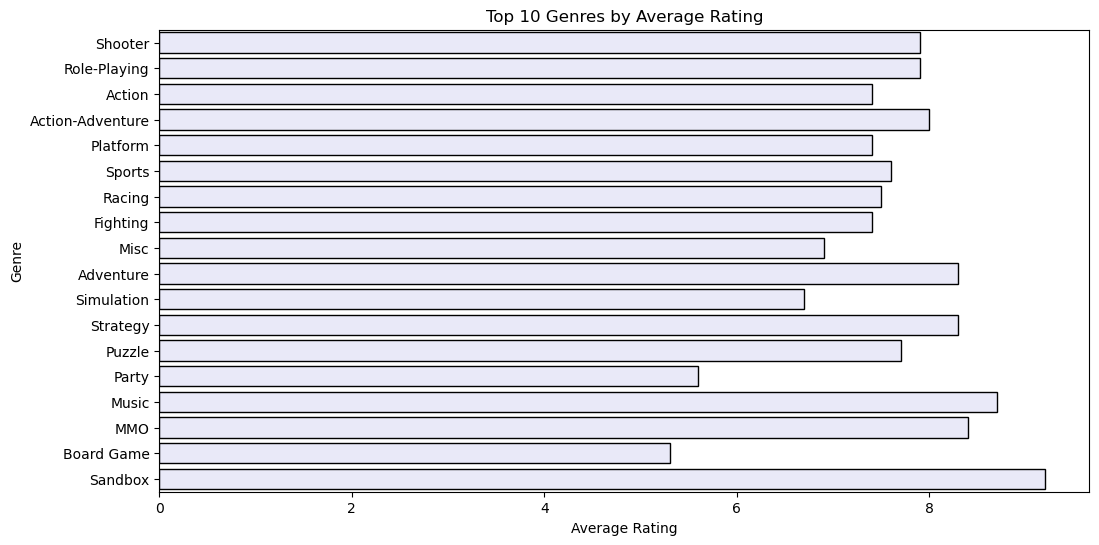

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='genre', data=sorted_genre_mean.head(20), color='lavender', edgecolor='black')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

In [19]:
#Save cleaned csv
cleaned_df.to_csv('cleaned_vgchartz.csv', index=False)